In [1]:
# Fonots

# Használathoz fel kell tölteni a metric_____.log filét ha Google Colabon használod.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from rich.progress import track
from datetime import datetime, date, time

In [2]:
import sys
 
# setting path
sys.path.append('../..')

import train_by_none as trbn

# from scale_by_train15 import read_trained_csv, get_train_features, get_current_worker_number, get_last_df_info

# from scale_by_train15 import load_tf_model

---------------------------------------
printTest
---------------------------------------
---------------------------------------
cyan
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
green
---------------------------------------
---------------------------------------
yellow
---------------------------------------
---------------------------------------
blue
---------------------------------------
---------------------------------------
magenta
---------------------------------------
---------------------------------------
white
---------------------------------------
---------------------------------------
red
---------------------------------------
---------------------------------------
                RESTART                
---------------------------------------
---------------------------------------
                SET LOG                
-------------------------

In [3]:
jmfile = 'test_023.csv'

jf = pd.read_csv(jmfile, sep=',', header=0)

jf['RT_LIMIT_UPPER'] = trbn.rt_limit_upper
jf['RT_LIMIT_LOWER'] = trbn.rt_limit_lower

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684565598437,60,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-2,text,True,NaN,323,138,42,40,http://193.225.250.30/cpu/fibonacci_no_gc/16,60,0,4,500,200
1,1684565598435,65,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-3,text,True,NaN,323,138,43,41,http://193.225.250.30/cpu/fibonacci_no_gc/16,65,0,4,500,200
2,1684565598437,64,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-6,text,True,NaN,323,138,43,42,http://193.225.250.30/cpu/fibonacci_no_gc/16,64,0,4,500,200


In [4]:
# Beérkezés sorrendje helyett a kiküldés sorrendjében rendezve

jf = jf.sort_values(by='timeStamp', ignore_index=True)

jf = jf.reset_index(drop=True)

jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER
0,1684565598435,65,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-3,text,True,NaN,323,138,43,41,http://193.225.250.30/cpu/fibonacci_no_gc/16,65,0,4,500,200
1,1684565598435,79,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-4,text,True,NaN,323,138,49,47,http://193.225.250.30/cpu/fibonacci_no_gc/16,79,0,5,500,200
2,1684565598436,79,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-5,text,True,NaN,323,138,49,48,http://193.225.250.30/cpu/fibonacci_no_gc/16,79,0,3,500,200


In [5]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

print(FIBO.shape)
print(PRIME.shape)

(19297, 19)
(0, 19)


In [6]:
import datetime

# Get current date and time
now = datetime.datetime.now()
print(now)
print("Second:", now.second)

2023-05-27 12:04:28.724829
Second: 28


In [7]:
jf = jf.astype({'timeStamp':'int'})
FIBO  = FIBO.astype({'timeStamp':'int'})
PRIME = PRIME.astype({'timeStamp':'int'})

import datetime

# Valójában ez mind szar, nem ezt akarom kiszámolni, hanem azt adott időszeletekben vett átlagot

jf['date'] = jf['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
FIBO['date'] = FIBO['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))
PRIME['date'] = PRIME['timeStamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000))

FIBO.head(2)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,RT_LIMIT_UPPER,RT_LIMIT_LOWER,date
0,1684565598435,65,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-3,text,True,NaN,323,138,43,41,http://193.225.250.30/cpu/fibonacci_no_gc/16,65,0,4,500,200,2023-05-20 06:53:18.435
1,1684565598435,79,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-4,text,True,NaN,323,138,49,47,http://193.225.250.30/cpu/fibonacci_no_gc/16,79,0,5,500,200,2023-05-20 06:53:18.435


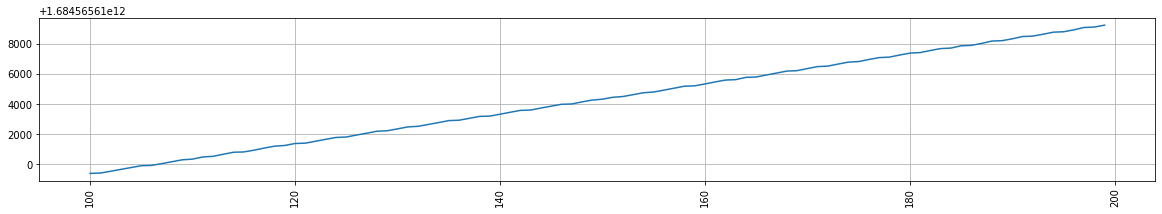

In [8]:
F = 100

plt.figure(figsize=(20, 3))
plt.plot(jf.iloc[F:F+100]['timeStamp'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

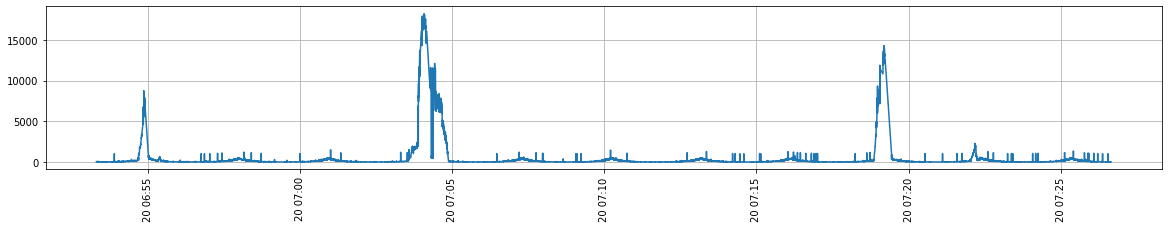

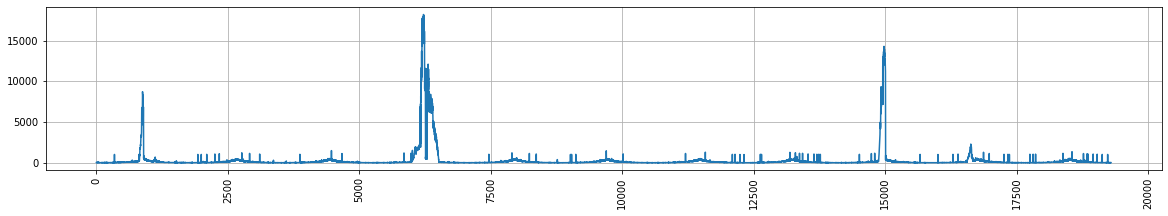

In [9]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

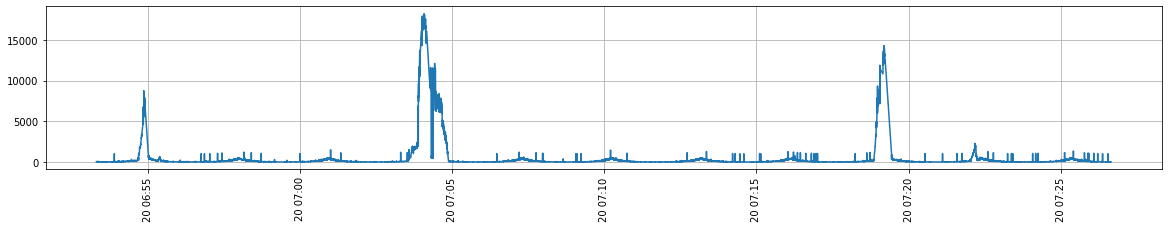

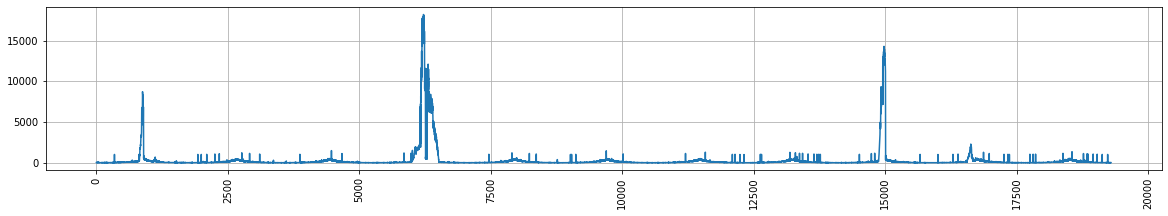

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(FIBO['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

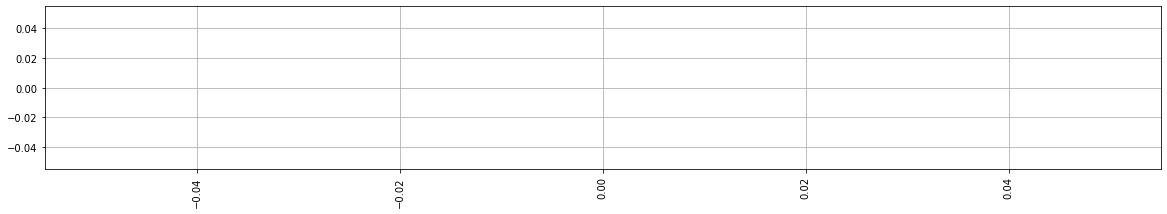

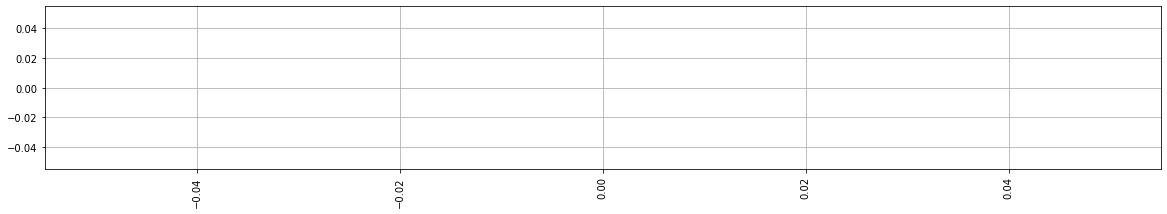

In [11]:
plt.figure(figsize=(20, 3))
plt.plot(PRIME['date'], PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(PRIME['Latency'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

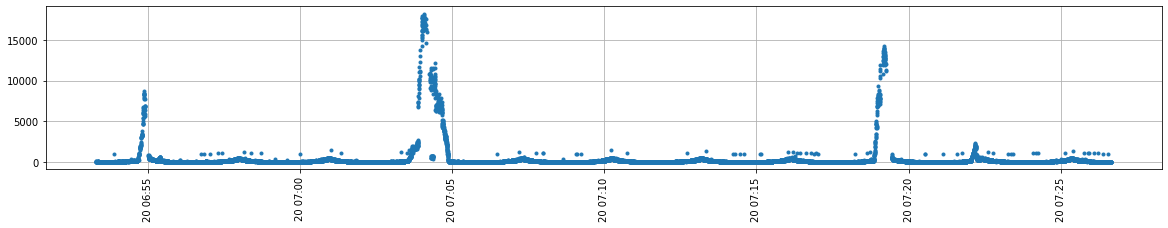

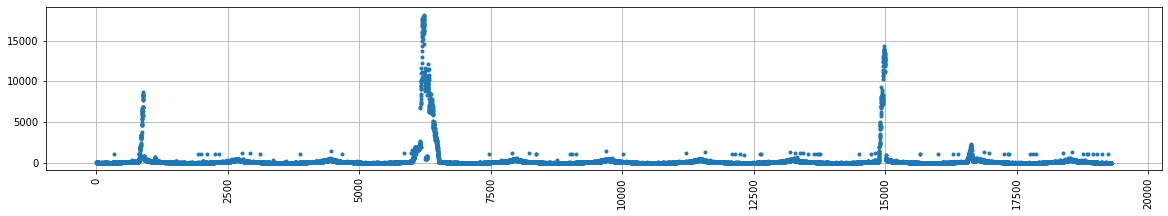

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [13]:
x = np.arange(0, jf['Latency'].size)
jf['_x'] = x

In [14]:

# rá kell toszni még a rolling meant és az időre számolt átlagot

jf['ma10rt'] = jf['Latency'].rolling(10).mean()


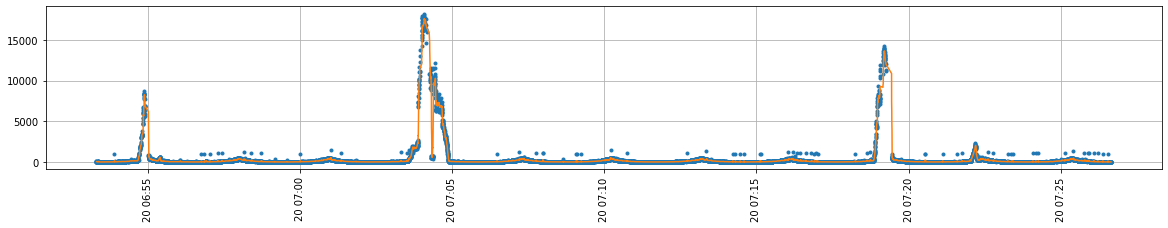

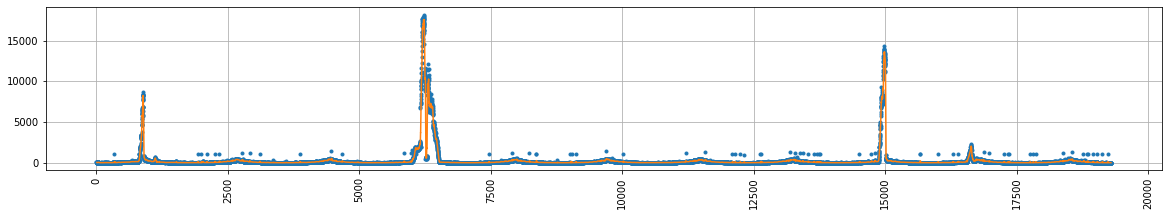

In [15]:
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [16]:
jf.groupby([jf['date'].dt.hour]).Latency.mean()

date
6    185.693878
7    350.890445
Name: Latency, dtype: float64

In [17]:
jf.groupby([jf['date'].dt.minute]).Latency.mean()

date
0      163.373534
1      125.339465
2       28.695000
3     1128.863894
4     5547.112532
5       36.392321
6       72.626667
7      216.064189
8       33.478333
9       85.125209
10     210.189916
11      29.668333
12      93.966499
13     195.966555
14      35.466667
15     110.813022
16     184.459098
17      29.811667
18     501.547368
19    2140.402439
20      41.826014
21      57.346667
22     387.776614
23      43.836667
24      63.226667
25     221.389262
26      49.737245
53      36.576355
54     790.548980
55     170.225256
56      37.911371
57     146.847315
58     148.806723
59      30.196667
Name: Latency, dtype: float64

In [18]:
jf.groupby(by=[jf.date.map(lambda x : x.hour),
               jf.date.map(lambda x : x.minute)]).Latency.mean()

date  date
6     53        36.576355
      54       790.548980
      55       170.225256
      56        37.911371
      57       146.847315
      58       148.806723
      59        30.196667
7     0        163.373534
      1        125.339465
      2         28.695000
      3       1128.863894
      4       5547.112532
      5         36.392321
      6         72.626667
      7        216.064189
      8         33.478333
      9         85.125209
      10       210.189916
      11        29.668333
      12        93.966499
      13       195.966555
      14        35.466667
      15       110.813022
      16       184.459098
      17        29.811667
      18       501.547368
      19      2140.402439
      20        41.826014
      21        57.346667
      22       387.776614
      23        43.836667
      24        63.226667
      25       221.389262
      26        49.737245
Name: Latency, dtype: float64

In [19]:
jf['date'][0].year
jf['date'][0].month
jf['date'][0].day
jf['date'][0].hour
jf['date'][0].minute
jf['date'][0].second

18

In [20]:
jf['hour']   = jf['date'].map(lambda x : x.hour)
jf['minute'] = jf['date'].map(lambda x : x.minute)
jf['second'] = jf['date'].map(lambda x : x.second)
jf['sec']    = jf['date'].map(lambda x : x.second//10)

In [21]:
md = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['date'].dt.second]).Latency.mean()

In [22]:
md

date  date  date
6     53    18      51.0
            19      38.2
            20      51.8
            21      65.2
            22      54.4
                    ... 
7     26    35      29.2
            36      29.3
            37      25.9
            38      26.8
            39      24.0
Name: Latency, Length: 1972, dtype: float64

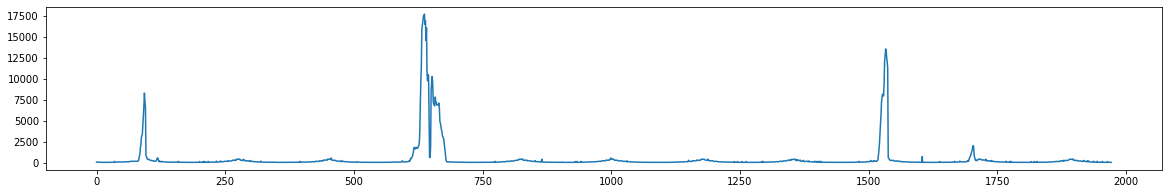

In [23]:
# Másodperc alapő válaszidő átlagok

plt.figure(figsize=(20, 3))
plt.plot(md.values)
plt.show()

In [24]:
_hours   = md.index.levels[0]
_minutes = md.index.levels[1]
_seconds = md.index.levels[2]

_hours_lowest =_hours.min()
_hours_highest = _hours.max()

_minutes_lowest = _minutes.min()
_minutes_highest = _minutes.max()

_seconds_lowest = _seconds.min()
_seconds_highest = _seconds.max()

print(' sec min %.1d sec max %.1d' % (_seconds_lowest, _seconds_highest))
print(' min min %.1d min max %.1d' % (_minutes_lowest, _minutes_highest))
print(' hrs min %.1d hrs max %.1d' % (_hours_lowest, _hours_highest))

 sec min 0 sec max 59
 min min 0 min max 59
 hrs min 6 hrs max 7


In [25]:
tp = []

start_date = str(jf['date'].loc[0])[:11]

for _ in md.index:
    h = _[0]
    # h = str(_[0]).zfill(2)
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    s = str('%02d' % (_[2],))
    # print(h, m, s)
    tp.append(start_date + str(h) + ':' + str(m) + ':' + str(s))

tp = pd.DataFrame(tp, columns=['date'])
tp = pd.to_datetime(tp['date'])
tp.head(3)

tp = pd.DataFrame(tp)
tp['md'] = 100
tp['md'] = md.values
tp.head()

,date,md
0,2023-05-20 06:53:18,51.0
1,2023-05-20 06:53:19,38.2
2,2023-05-20 06:53:20,51.8
3,2023-05-20 06:53:21,65.2
4,2023-05-20 06:53:22,54.4


In [26]:
mz = jf.groupby([jf['date'].dt.hour, jf['date'].dt.minute, jf['sec']]).Latency.mean()

mz

date  date  sec
6     53    1       44.263158
            2       33.568182
            3       29.860000
            4       29.313131
            5       51.670000
                      ...    
7     25    5      114.560000
      26    0       67.480000
            1       50.510000
            2       40.890000
            3       39.228261
Name: Latency, Length: 201, dtype: float64

In [27]:
# Meg van a 10 másodperces, ehhez kell legyártani most a dátumokat

# 10 másodperces

tt = []
tz = []

start_date = str(jf['date'].loc[0])[:11]

_first_sec = jf['second'].loc[0]

c = 0
for _ in mz.index:
    h = _[0]
    h = str('%02d' % (_[0],))
    m = _[1]
    m = str('%02d' % (_[1],))
    s = _[2]
    
    if c == 0:
        c += 1
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(_first_sec))
        print(tz)
    else:
        tt.append([h, m, s])
        tz.append(start_date + str(h) + ':' + str(m) + ':' + str(s*10))
        
    # print(s, _)

tz = pd.DataFrame(tz, columns=['date'])
tz.head()

tz = pd.to_datetime(tz['date'])
tz.head()

tz = pd.DataFrame(tz)
tz['md'] = 100
tz['md'] = mz.values
tz.head()

# Össze van fűzve a tz (idő) és az mz (group by sec) -> lehet rátenni a plotra

['2023-05-20 06:53:18']


,date,md
0,2023-05-20 06:53:18,44.263158
1,2023-05-20 06:53:20,33.568182
2,2023-05-20 06:53:30,29.860000
3,2023-05-20 06:53:40,29.313131
4,2023-05-20 06:53:50,51.670000


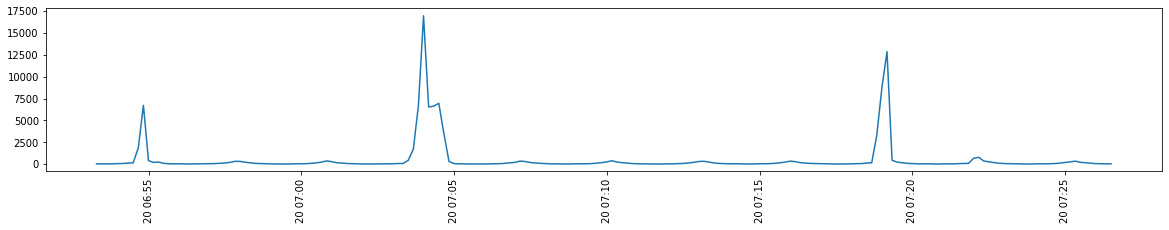

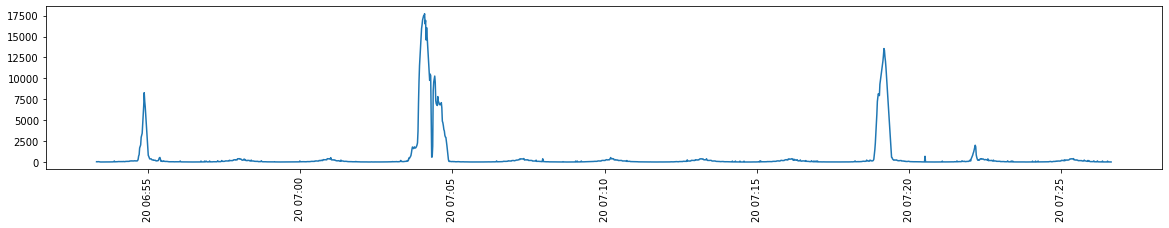

In [28]:
plt.figure(figsize=(20, 3))
plt.plot(tz['date'], tz['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a tiz másodperc alapú)

plt.figure(figsize=(20, 3))
plt.plot(tp['date'], tp['md'])
plt.xticks(rotation=90)
plt.show()

# Ezt kéne rátenni a másikra (ez a másodperc másodperc alapú)

In [29]:
print(tp['date'][0])
print(tz['date'][0])

2023-05-20 06:53:18
2023-05-20 06:53:18


In [30]:
# Ha tologatnom kéne őket

from datetime import datetime, timedelta

# tz['date'] = tz['date'] + timedelta(seconds=1)
# tp['date'] = tp['date'] + timedelta(seconds=1)

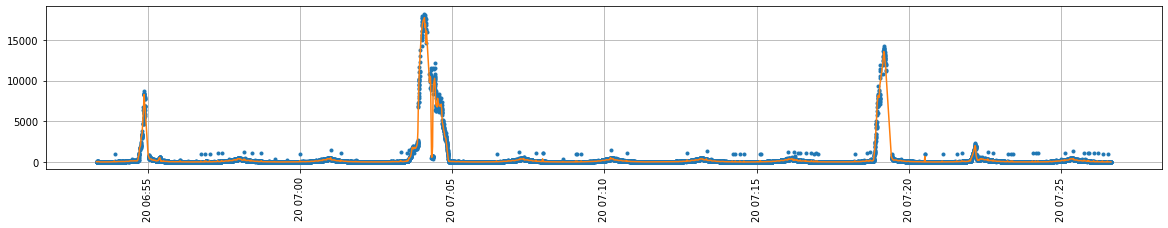

In [31]:
# Idő alapú (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

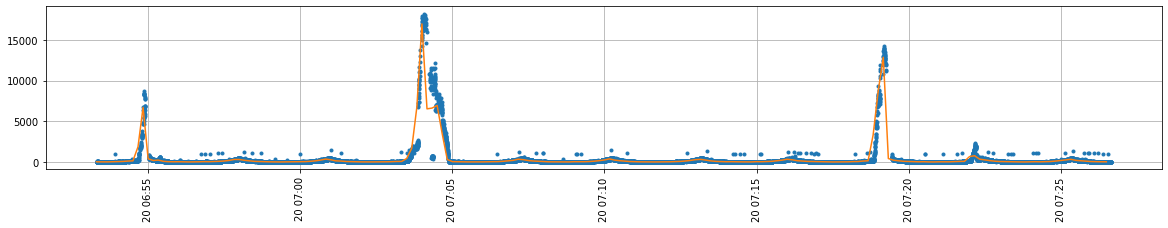

In [32]:
# Idő alapú (jo) -> esetleg még ez (ha nagyon sok adat van és hosszú volt a futás)
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tz['date'], tz['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

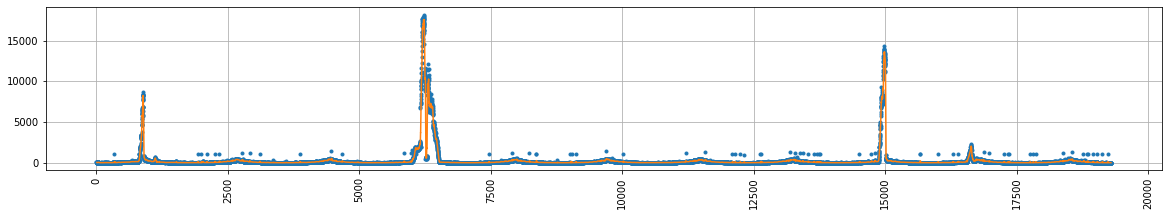

In [33]:
# Seqvencia alapú (ahogy jöttek be a kérések úgy van plottolva sorban egymás után)

# Az erre helyezet 10-es mozgóátlag nem az elmúlt 10 mp hanem az utolsó 10 kérés válaszidejének átlaga
plt.figure(figsize=(20, 3))
plt.plot(jf['Latency'], marker='.', linewidth=0)
plt.plot(jf['ma10rt'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Tehát ez volt a rossz amit ki akartam javítani.

De ami még hiányzik, hogy a fentire rátegyem a VM-ek számának alaulását.

(Ugye az van hogy a két adat kétféle adatbáisból jön)

Az egyes latencyket a JMeter, A metrikákat (így a VM számot is a LoadBalacner) rögzítette

Ezt a kettőt kell összefésülni.

---

Most van az, hogy jól jönne a **Scaler.log** mert a **Metric.log** csak 10 másodpercenként mintavételez, de lehet, hogy már a mintavételezés felénél meg volt a skálázás és ezt jó lenne látni, főként azért hogy korrelál a nagy felbontású válaszidő alakulásával ami meg a JMeterből jön.

A **Scaler.log**-ban csak a skálázáskor kiadott parancs időbélyege van eltárolva.

# Scaler.log - Metric.log - JMeter.log

In [34]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,06:53:22,06:53:2,64.54160,34.848263,1,1.9,9.2,82.3,12.4,...,105389.6,975785.2,2048.0,345929.2,100.0,20.9,20.9,20.2,20.9,20.2
1,192.168.0.6,06:53:30,06:53:3,51.54765,23.909114,1,8.8,15.0,74.5,19.7,...,105396.0,978940.0,2048.0,347234.0,100.0,53.6,53.6,52.2,53.6,52.3
2,192.168.0.6,06:53:40,06:53:4,42.32600,23.453980,3,10.1,9.5,88.0,11.8,...,104144.0,976289.6,2048.0,342557.6,100.0,26.1,26.1,25.4,25.6,25.0
3,192.168.0.6,06:53:50,06:53:5,26.38870,20.319485,2,9.9,13.3,84.4,15.5,...,104156.0,975278.4,2048.0,342531.6,100.0,30.6,30.6,29.6,30.6,29.7
4,192.168.0.6,06:54:00,06:54:0,55.03840,32.386930,4,10.0,10.0,87.0,12.7,...,104168.0,975758.4,2048.0,342485.6,100.0,17.5,17.5,17.4,17.5,17.5


In [35]:
jf[['date']].head(3)

,date
0,2023-05-20 06:53:18.435
1,2023-05-20 06:53:18.435
2,2023-05-20 06:53:18.436


In [36]:
df[['time']].head(3)

,time
0,06:53:2
1,06:53:3
2,06:53:4


In [37]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


In [38]:
scale_file_name = 'scaled_train_by_none.log'

sf = pd.read_csv(scale_file_name, sep=',', header=0)

display(sf.head(2))

,time,notification,actual_vm_number_was,actual_vm_number_is
0,06:53:30,Worker 192.168.0.73 added.,1,2
1,06:53:30,Worker 192.168.0.91 added.,2,3


In [39]:
print('Scaler.log')
print(sf['time'].iloc[0])
print(sf['time'].iloc[-1])
print(len(sf))

print('JMeter.log')
print(jf['date'].iloc[0])
print(jf['date'].iloc[-1])
print(len(jf))

Scaler.log
06:53:30
07:26:30
298
JMeter.log
2023-05-20 06:53:18.435000
2023-05-20 07:26:39.100000
19297


Az sf (slacer.log) alapján meg lehetne mondani, hogy mikor mi volt a gépek száma.


A jf.date (datetime64) végig lehet iterálni a jf összes során és összenézni az sf time (??) sorával

In [40]:
jf['date']

0       2023-05-20 06:53:18.435
1       2023-05-20 06:53:18.435
2       2023-05-20 06:53:18.436
3       2023-05-20 06:53:18.437
4       2023-05-20 06:53:18.437
                  ...          
19292   2023-05-20 07:26:38.712
19293   2023-05-20 07:26:38.813
19294   2023-05-20 07:26:38.914
19295   2023-05-20 07:26:39.016
19296   2023-05-20 07:26:39.100
Name: date, Length: 19297, dtype: datetime64[ns]

In [41]:
sf['time']

# Ez sajnos nekem még kevés ugyhogy picit átalkítom

0      06:53:30
1      06:53:30
2      06:53:40
3      06:53:50
4      06:53:50
         ...   
293    07:26:20
294    07:26:20
295    07:26:30
296    07:26:30
297    07:26:30
Name: time, Length: 298, dtype: object

In [42]:
start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '
print(start_date)

sf['date'] = start_date + sf['time']
sf['date'] = sf['date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))

sf.head(3)

# kiegészítettem az év:hónap:nap-pal

2023-05-20 


,time,notification,actual_vm_number_was,actual_vm_number_is,date
0,06:53:30,Worker 192.168.0.73 added.,1,2,2023-05-20 06:53:30
1,06:53:30,Worker 192.168.0.91 added.,2,3,2023-05-20 06:53:30
2,06:53:40,Worker 192.168.0.73 removed.,3,2,2023-05-20 06:53:40


In [43]:
sf['date']

0     2023-05-20 06:53:30
1     2023-05-20 06:53:30
2     2023-05-20 06:53:40
3     2023-05-20 06:53:50
4     2023-05-20 06:53:50
              ...        
293   2023-05-20 07:26:20
294   2023-05-20 07:26:20
295   2023-05-20 07:26:30
296   2023-05-20 07:26:30
297   2023-05-20 07:26:30
Name: date, Length: 298, dtype: datetime64[ns]

In [44]:
jf['date']

0       2023-05-20 06:53:18.435
1       2023-05-20 06:53:18.435
2       2023-05-20 06:53:18.436
3       2023-05-20 06:53:18.437
4       2023-05-20 06:53:18.437
                  ...          
19292   2023-05-20 07:26:38.712
19293   2023-05-20 07:26:38.813
19294   2023-05-20 07:26:38.914
19295   2023-05-20 07:26:39.016
19296   2023-05-20 07:26:39.100
Name: date, Length: 19297, dtype: datetime64[ns]

In [45]:
jf['date'].iloc[3]

Timestamp('2023-05-20 06:53:18.437000')

In [46]:
jf['dates'] = jf['date'].apply(lambda d: d.replace(microsecond=0))

In [47]:
jf['dates'].iloc[3]

Timestamp('2023-05-20 06:53:18')

In [48]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

# Sajnos ez a megoldás ezen az adatbázison nem lesz jó

# -----------------------------------------------------


# Bár most azok után, hogy rendeztem az adatokat a time
# szerint már lehet, hogy jó lesz


_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

jf['sf_vm'] = 0

c = 0

for i in track(range(jf['Latency'].shape[0])):
    jf['sf_vm'].iloc[i] = _current_vm_number

    jf_date = jf['dates'].iloc[i]
    
    if c < len(sf):
        if jf_date == _current_scale_date:
            # print('    Scale', jf_date, _current_scale_date, _current_vm_number)
            _current_vm_number = sf['actual_vm_number_is'].iloc[c]
            if c + 1 < len(sf):
                _current_scale_date = sf['date'].iloc[c + 1]
                # print('--> Scale', jf_date, _current_scale_date, _current_vm_number)


            c += 1
            # print(c)
            # print(i)


Output()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

1
5


# Kiegészítés

Itt akadtam meg már a 26,25,24-ben lefutott erre it megkadat az algoritmus,
ami a JMeter.csv és a Scaler.log alapján a JMeter.csv-hez rendeli a megfelelő
időpontban a megfelelő Worker számokat.

Az algo azért akad meg, mert van egy pont amikor skálázás volt a Scaler.log
timestamp alapján viszont abban az időpontban a JMeter.log nem rögzített értéket
ezért azon a ponton eltörik az algo.

    14 	06:54:30 	Worker 192.168.0.192 removed. 	3 	2 	2023-05-20 06:54:30
    15 	06:54:41 	Worker 192.168.0.220 removed. 	2 	1 	2023-05-20 06:54:41
    16 	06:54:57 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 06:54:57
    17 	06:54:57 	Worker 192.168.0.91 added. 	2 	3 	2023-05-20 06:54:57
    18 	06:54:57 	Worker 192.168.0.93 added. 	3 	4 	2023-05-20 06:54:57
    
valhol itt.

In [49]:
# Van e bárhol ilyen dátum?

answer = []
where = []

for date in sf['date']:
    # print(date)
    # found = (jf['dates'] == '2023-05-21 09:22:03').any(axis=0)
    found = (jf['dates'] == date).any(axis=0)
    answer.append(found)
    if found == False:
        where.append(date)

# print(set(answer))

print('Azok az Scaler.log dátumok amelyek nincsenek benne JMeter.log-ban:')
for _ in where: print(_)

Azok az Scaler.log dátumok amelyek nincsenek benne JMeter.log-ban:
2023-05-20 06:54:57
2023-05-20 06:54:57
2023-05-20 06:54:57
2023-05-20 07:19:24
2023-05-20 07:19:24


In [50]:
default = {
    'timeStamp': np.nan,
    'elapsed': np.nan,
    'label': '',
    'responseCode': np.nan,
    'responseMessage': np.nan,
    'threadName': '',
    'dataType': '',
    'success': False,
    'failureMessage': np.nan,
    'bytes': np.nan,
    'sentBytes': np.nan,
    'grpThreads': np.nan,
    'allThreads': np.nan,
    'URL': '',
    'Latency': np.nan,
    'IdleTime': np.nan,
    'bytes': np.nan,
    'Connect': np.nan,
    'RT_LIMIT_UPPER': np.nan,
    'RT_LIMIT_LOWER': np.nan,
    'date': '',                   # ez lesz majd beszúrva datetime64[ns]
    '_x': np.nan,
    'ma10rt': np.nan,
    'hour': np.nan,
    'minute': np.nan,
    'second': np.nan,
    'sec': np.nan,
    'dates': '',                  # ez lesz madj beszúrva datetime64[ns]
    'sf_vm': np.nan,              # ez lesz majd beszúva (int64)
}


af = jf.copy()

# for _ in af.columns:
#     print(_, af[_].dtype)
    

    # Tehát a feladat az, hogy végig iteráljak az 'Scaler.log' on és ha olyan dátum van ami nincs benne a
    # JMeter.log-ban akkor azt egyem bele

for missing_date in where:
    print(missing_date)
    d = missing_date
    
    # Fölösleges mivel a missing_date már elefe datetime object
    # d = datetime.strptime(d, '%Y-%m-%d %H:%M:%S')

    row = {'date': d, 'dates': d}

    af = af.append({**default, **row}, ignore_index=True)

# Mivel az új dátumok a DataFrame végére kerülnek ezért ismét rendezni kell őket (date és timeStamp alapján)
#  vagy egyszerűen a date alapján mert az lett konvertálva a timeStampből és örzi a milisec információkat is

af = af.sort_values(by='date', ignore_index=True)

af = af.reset_index(drop=True)

af.head(3)


2023-05-20 06:54:57
2023-05-20 06:54:57
2023-05-20 06:54:57
2023-05-20 07:19:24
2023-05-20 07:19:24


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,1.684566e+12,65.0,HTTP Request FIBO,200.0,NaN,Thread Group FIBO-ThreadStarter 1-3,text,True,NaN,323.0,...,200.0,2023-05-20 06:53:18.435,0.0,NaN,6.0,53.0,18.0,1.0,2023-05-20 06:53:18,1.0
1,1.684566e+12,79.0,HTTP Request FIBO,200.0,NaN,Thread Group FIBO-ThreadStarter 1-4,text,True,NaN,323.0,...,200.0,2023-05-20 06:53:18.435,1.0,NaN,6.0,53.0,18.0,1.0,2023-05-20 06:53:18,1.0
2,1.684566e+12,79.0,HTTP Request FIBO,200.0,NaN,Thread Group FIBO-ThreadStarter 1-5,text,True,NaN,323.0,...,200.0,2023-05-20 06:53:18.436,2.0,NaN,6.0,53.0,18.0,1.0,2023-05-20 06:53:18,1.0


In [51]:
# Van e bárhol ilyen dátum de most az af-ben, elvileg kéne, hogy legyen

for _ in sf['date'].iloc[10:20]:
    res_af = (af['dates'] == _).any(axis=0) # itt vann, hogy melyik dátum az ami nincs a sf-ben
    res_jf = (jf['dates'] == _).any(axis=0) # itt vann, hogy melyik dátum az ami nincs a jf-ben
    print(_, res_af, res_jf)

2023-05-20 06:54:20 True True
2023-05-20 06:54:20 True True
2023-05-20 06:54:30 True True
2023-05-20 06:54:30 True True
2023-05-20 06:54:30 True True
2023-05-20 06:54:41 True True
2023-05-20 06:54:57 True False
2023-05-20 06:54:57 True False
2023-05-20 06:54:57 True False
2023-05-20 06:55:02 True True


In [52]:
# most az sf-t össze mergelem a jf-el a következő módon

# -----------------------------------------------------

_first_vm_number = sf['actual_vm_number_was'].iloc[0]
print(_first_vm_number)

_last_vm_number = sf['actual_vm_number_is'].iloc[-1]
print(_last_vm_number)

_len_sf = len(sf)

_current_vm_number = _first_vm_number

_first_scale_date = sf['date'].iloc[0]
_current_scale_date = _first_scale_date

af['sf_vm'] = -1

c = 0

for i in track(range(af['Latency'].shape[0])):
    af['sf_vm'].iloc[i] = _current_vm_number

    af_date = af['dates'].iloc[i]
    
    if c < len(sf):
        if af_date == _current_scale_date:
            # print('    Scale', af_date, _current_scale_date, _current_vm_number)
            _current_vm_number = sf['actual_vm_number_is'].iloc[c]
            if c + 1 < len(sf):
                _current_scale_date = sf['date'].iloc[c + 1]
                # print('--> Scale', af_date, _current_scale_date, _current_vm_number)


            c += 1
            # print(c)
            # print(i)


Output()

/home/ubuntu/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)

1
5


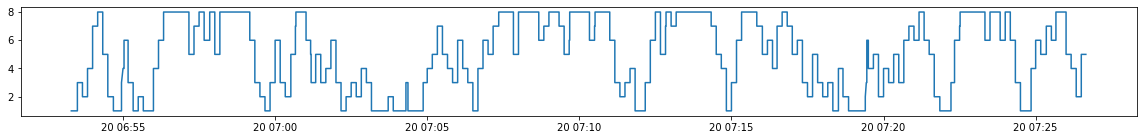

In [53]:
# Dátum alapján rendezet af

plt.figure(figsize=(20,2))
plt.plot(af['dates'], af['sf_vm'])
plt.show()

In [54]:
sf.iloc[10:20].head(100)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
10,06:54:20,Worker 192.168.0.91 removed.,7,6,2023-05-20 06:54:20
11,06:54:20,Worker 192.168.0.93 removed.,6,5,2023-05-20 06:54:20
12,06:54:30,Worker 192.168.0.146 removed.,5,4,2023-05-20 06:54:30
13,06:54:30,Worker 192.168.0.148 removed.,4,3,2023-05-20 06:54:30
14,06:54:30,Worker 192.168.0.192 removed.,3,2,2023-05-20 06:54:30
15,06:54:41,Worker 192.168.0.220 removed.,2,1,2023-05-20 06:54:41
16,06:54:57,Worker 192.168.0.73 added.,1,2,2023-05-20 06:54:57
17,06:54:57,Worker 192.168.0.91 added.,2,3,2023-05-20 06:54:57
18,06:54:57,Worker 192.168.0.93 added.,3,4,2023-05-20 06:54:57
19,06:55:02,Worker 192.168.0.146 added.,4,5,2023-05-20 06:55:02


<h2> <font color="red">Vannak durva anomáliák</font> </h2>

Például ez hogy lehetséges?

    154 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01
    155 	08:55:01 	Worker 192.168.0.73 added. 	1 	2 	2023-05-20 08:55:01

Bele néztem a train_by_none.py kódba is és nem tudom az okát

---

Amúgy érdkes, hogy milyen időpontokban ad hozzá, vesz el vm-ket.

Megnéztem a programot amit írtam és akkor kerül bele a **Scale.log** filébe a bejegyzés és az időbélyeg,
amikor kiadta a skálázási parancsot.

Ez az esetek többségében 10-ik másodperc valahányszorosa.

Nem elfelejteni, hogy a tanulóadatok előállításánál nincs semmilyen számátás ami miatt késne a rendszer.

Ezért az a gyanúm, hogy a tényleges skálázásnál ez már nem így lesz.

Ennek ellenére látok néhány adatot amikor példul

    92 	09:33:50 	Worker 192.168.0.73 removed.
    93 	09:34:02 	Worker 192.168.0.73 added.

Nem teljesen értem, hogy a faszba fordulhatott elő, hogy két máodperc múlva is meg lett hívva ez az eljárás.

Ezért ennek most egy picit utána nézek.

## Sajnos meg is fejtettem az okát.

Ugye amikor túl van terhelve a rendszer akkor később érkezik be egy válaszidő ezért és mivel az egész rendszer akkor triggerelődik amikor bejön egy válaszidő ezért van ez a csúszkálás.

Ez megoldódna ha minden 10-ik másodpercben lefutna a rendszer de jelenleg nem így működik, és most még nem is foglalkozom vele, hogy átírjam a rendszert.

In [55]:
sf_second = sf['date'].dt.second

np.unique(sf_second, return_counts=True)

(array([ 0,  1,  2, 10, 11, 13, 18, 20, 21, 22, 24, 27, 30, 31, 40, 41, 43,
        50, 51, 52, 53, 57]),
 array([39,  8,  2, 41,  7,  2,  2, 48,  5,  2,  2,  3, 40,  9, 36,  4,  1,
        33,  8,  2,  1,  3]))

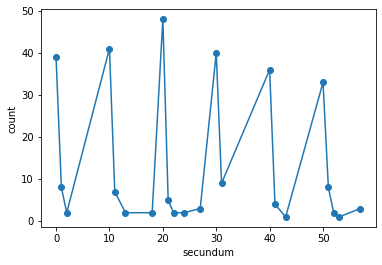

In [56]:
_ = np.unique(sf_second, return_counts=True)

plt.scatter(_[0], _[1])
plt.plot(_[0], _[1])
plt.xlabel('secundum')
plt.ylabel('count')
plt.show()

# többségében 10 valahányszorosára jön ki a skálázás, de sok olyan eset is van amikor nem.

In [57]:
# Van e bárhol ilyen dátum?

(jf['dates'] == '2023-05-21 09:22:03').any(axis=0)

False

In [58]:
jf.head(3)

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,...,RT_LIMIT_LOWER,date,_x,ma10rt,hour,minute,second,sec,dates,sf_vm
0,1684565598435,65,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-3,text,True,NaN,323,...,200,2023-05-20 06:53:18.435,0,NaN,6,53,18,1,2023-05-20 06:53:18,1
1,1684565598435,79,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-4,text,True,NaN,323,...,200,2023-05-20 06:53:18.435,1,NaN,6,53,18,1,2023-05-20 06:53:18,1
2,1684565598436,79,HTTP Request FIBO,200,NaN,Thread Group FIBO-ThreadStarter 1-5,text,True,NaN,323,...,200,2023-05-20 06:53:18.436,2,NaN,6,53,18,1,2023-05-20 06:53:18,1


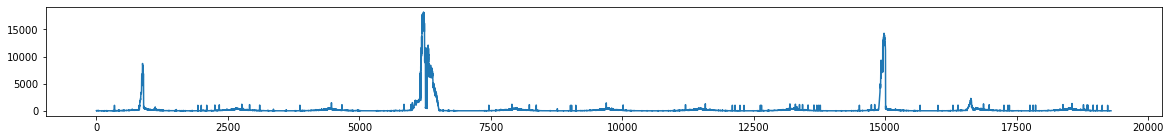

In [59]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['Latency'])
plt.show()

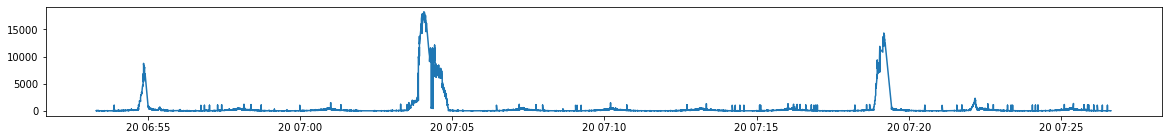

In [60]:
# Dátum alapján rendezett jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['Latency'])
plt.show()

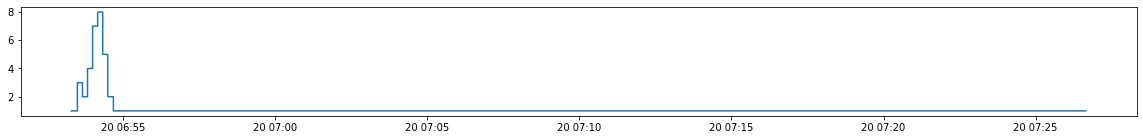

In [61]:
# Dátum alapján rendezet jf

plt.figure(figsize=(20,2))
plt.plot(jf['dates'], jf['sf_vm'])
plt.show()

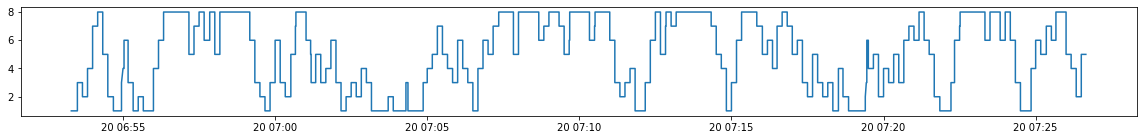

In [62]:
# Dátum alapján rendezet af

plt.figure(figsize=(20,2))
plt.plot(af['dates'], af['sf_vm'])
plt.show()

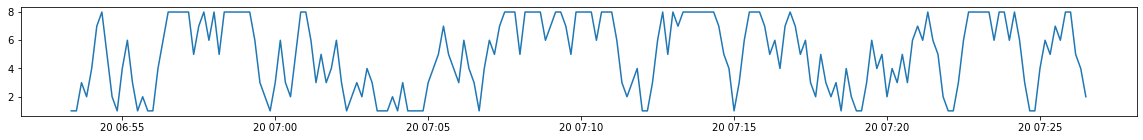

In [63]:
# Metric.log-ból kiolvasott VM Number

plt.figure(figsize=(20,2))
plt.plot(df['nntime'], df['worker_number'])
plt.show()

In [66]:

# Most van egy olyan jf dataframem amiben benne van a JMeter adat és a Scaler.log-ból származó skálázások is

# Érdemes lenne egy plotton ábrázolni a korábban már megcsinált 1 másodpercre, 10 másodpercre aggregált
# átalgos válaszidőket és a virtuális gépke számát is


## Ezt feljebb már megcsináltam

De most itt hagyom mert csak plottolás

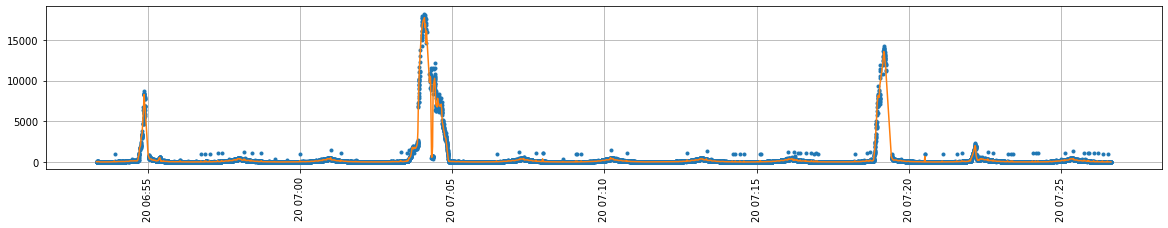

In [67]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['Latency'], marker='.', linewidth=0)
plt.plot(tp['date'], tp['md'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

## Ezen dolgoztam

Hogy a JMeter.log és a Metric.log vagyis Scale.log wm_number egy df-be és egy ábrára kerüljenek.

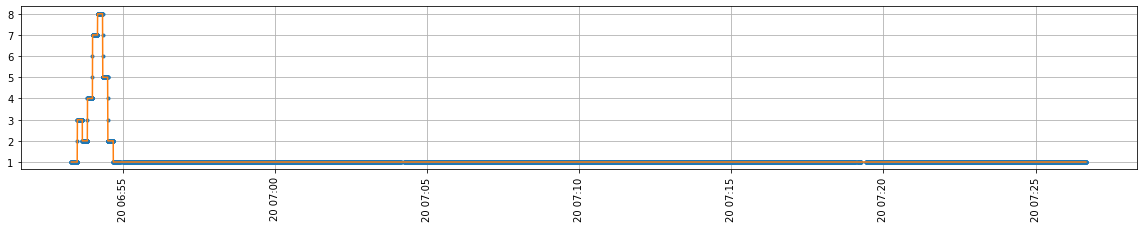

In [68]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
plt.plot(jf['date'], jf['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

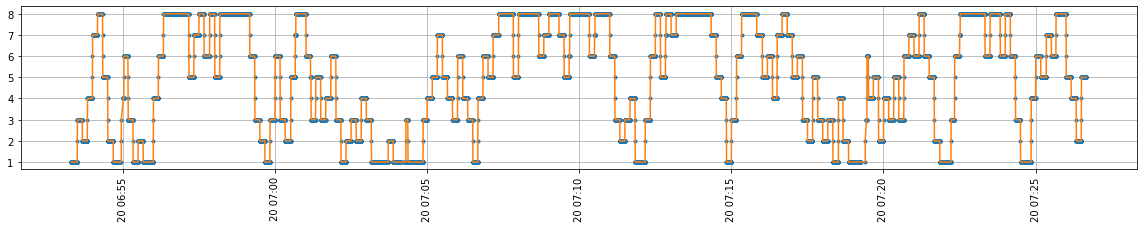

In [69]:
# Másodperc alapú átlag (jo) -> ez kell majd nekem
plt.figure(figsize=(20, 3))
plt.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
plt.plot(af['date'], af['sf_vm'])
plt.grid(b='on')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Ellenőrzés (felületes)

sf.tail(5)

,time,notification,actual_vm_number_was,actual_vm_number_is,date
293,07:26:20,Worker 192.168.0.148 removed.,4,3,2023-05-20 07:26:20
294,07:26:20,Worker 192.168.0.192 removed.,3,2,2023-05-20 07:26:20
295,07:26:30,Worker 192.168.0.73 added.,2,3,2023-05-20 07:26:30
296,07:26:30,Worker 192.168.0.91 added.,3,4,2023-05-20 07:26:30
297,07:26:30,Worker 192.168.0.93 added.,4,5,2023-05-20 07:26:30


## Ezen dolgoztam

A két logfiléből kinyert adat együtt - JMeter.log és Scale.log vm_number

**tp\['date'\]** és **tp\['md'\]** a JMeter.log-ból számolt másodpercekre lebontott átlagú **Latency** a JMetric.log-ból.

**jf\['date'\]** és **jf\['sf_vm'\]** a Scaler.log alapján a JMeter df-be létrehozott **Worker Number**

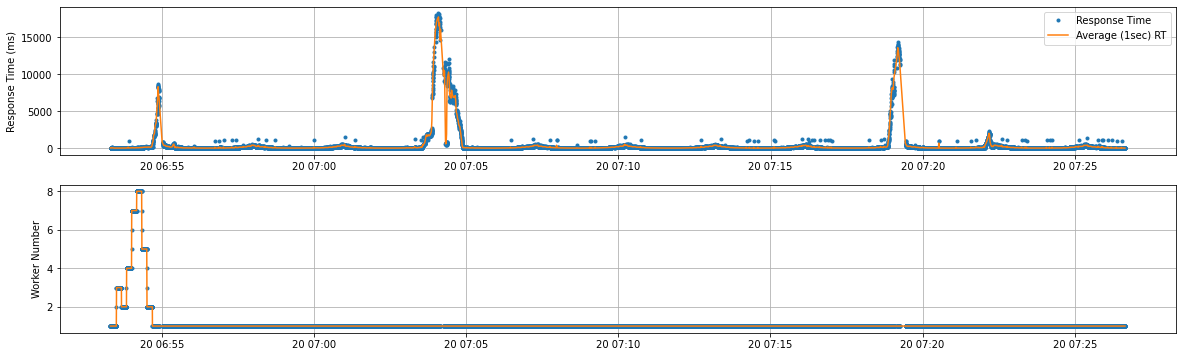

In [71]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(jf['date'], jf['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(jf['date'], jf['sf_vm'], marker='.', linewidth=0)
ax1.plot(jf['date'], jf['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

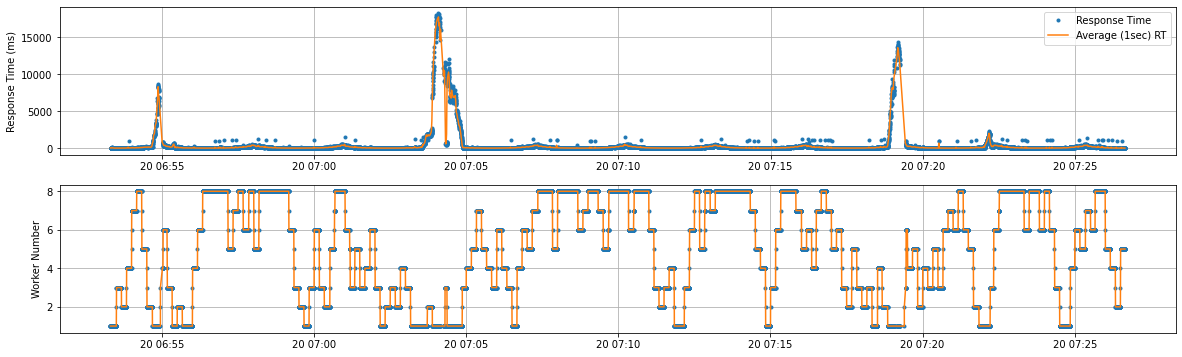

In [72]:
# Na most akkor a kettő együtt

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(af['date'], af['Latency'], marker='.', linewidth=0, label='Response Time')
ax0.plot(tp['date'], tp['md'], label='Average (1sec) RT')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
ax1.plot(af['date'], af['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

    nem az ábra alapján vonnám le ezt a tanulságot de a skálázás hatása elég gyorsan jelentkezik

## A jf alapján meg lehet nézni mindkét API-t

A jf alapján meg lehet nézni mindkét API-t?

In [73]:
FIBO  = jf.loc[jf['label'] == 'HTTP Request FIBO']

PRIME = jf.loc[jf['label'] == 'HTTP Request PRIME']

## JMeter.log alapján

A két REST API 10 másodpercenként mért átlagos válaszideje - a **JMeter.csv** alapján.

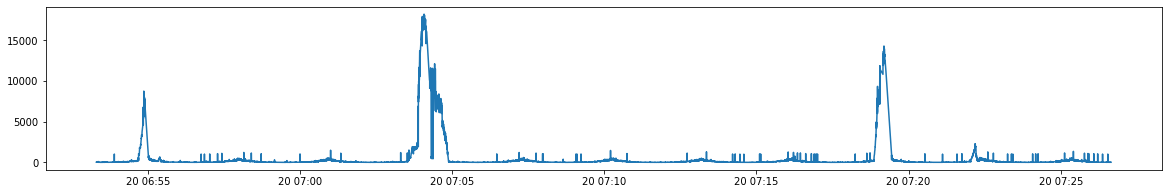

In [74]:
plt.figure(figsize=(20, 3))
plt.plot(FIBO['date'], FIBO['Latency'])
plt.plot(PRIME['date'], PRIME['Latency'])
plt.show()

## JMeter.log és Scaler.log alapján

Mellé teszem a **Scaler.log** alapján kinyert **worker_number** válotzót is.

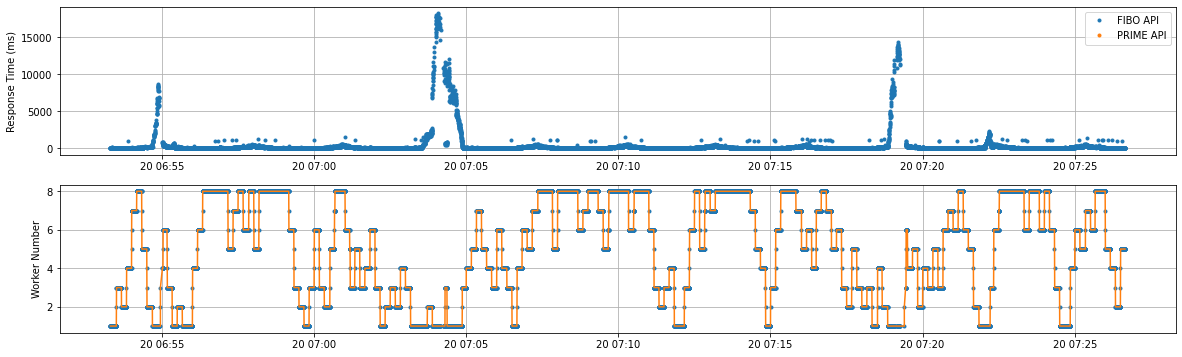

In [76]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20, 6))

ax0.plot(FIBO['date'], FIBO['Latency'], marker='.', linewidth=0, label='FIBO API')
ax0.plot(PRIME['date'], PRIME['Latency'], marker='.', linewidth=0, label='PRIME API')
ax0.set_ylabel('Response Time (ms)')
ax0.grid(b='on')
ax0.legend()
# ax0.tick_params(axis='x', rotation=90)

# Másodperc alapú átlag (jo) -> ez kell majd nekem
ax1.plot(af['date'], af['sf_vm'], marker='.', linewidth=0)
ax1.plot(af['date'], af['sf_vm'])
ax1.set_ylabel('Worker Number')
ax1.grid(b='on')
# ax1.tick_params(axis='x', rotation=90)
plt.show()

## Miért csináltam ezt az egészet?

### Különös tekintettel erre az adott Test26 mérésre.

Ebben a terhelésben két REST API végpontot hívtam. A metric_log filében 10 másodpercentként visszamért átlagos válaszidőből nem tudom megállapítani, hogy melyik REST API végponthoz melyik válaszidő tartozik és ez nem is lehetséges, hiszen ezek még átlagolva is voltak.

Amire csak kíváncsi voltam, hogy hat-e az egyik REST API válaszidejére a másik REST API. Mivel ebben a kisérletben aszinkronban voltak a REST API-k, a beérkező kérések száma mindkettőre azonos és konstans volt. Csak a kapott paraméteren keresztül tudtam hatást gyakorolni arra, hogy mennyire legyen számításigényes az adott feladat. Ezek a paraméterek kerültek aszinkron módon beküldésre úgy, hogy amikor az egyik REST API számításigényes paramétert kapott akkor a másik nem és fordítva.

**Ha ezek után** a két válaszidő külön külön is egy időben emelkedett meg és a válaszidejeik megemelkedései szinkronban vannak, akkor ez azt jelenti, hogy a másik REST API hatása.

Igaz ezt a kísérletet jobb lett volna úgy elvégezni, hogy közben nem mozgatom a Workerek számát, mert önmagában ez is hatással lehet egyik vagy másik vagy mindkét REST API válaszidejére.

---

Ezek után nézzük meg, hogy alault a két REST API válaszideje és a Workerek száma.

## Fontos

Ami itt kövektezik, az nem lehet annyira pontos mint a JMeter.log és a Scaler.log alapján összerakott megoldás.

**Miért?**

Mert a Metric.log filokban a MyLog.log fileből és az Access.log-ból kinyert és 10 másodpercre aggregált átlagok vannak.

**Megjegyzés:**

A **Metric.log** fájlba az idő **HH:MM:S** formátumba kerül. Ezért még hozzá kell adnom az **Y-m-d** adatot és egy **0**-t a **s** mögé.

Azt viszont, hogy mi volt az **Év-Hónap-Nap** a **Metric.log** filéből nem lehet megtudni, de ha rendesen tároltam el a teszt mérési eredményket akkor a könyvtárban ott van a **JMeter.csv** file is amiben viszont benne van a dátum.

Ha egy mérés nem csúszik át egyik napból a másikba akkor egyszerűen ki lehet olvani a **JMeter.csv** file első sorából a dátumot és azt beilleszteni a **Metric.log** adataiba.

Egyszerűbb lett volna, ha a **Metric.log** készítésénél beillesztem a dátumot is amikor a mérés zajlik de most már így alakult és nem fogok 26 mérést újra csinálni.

In [71]:
start_date = '2023-05-17 13:55:26'

start_date = str(jf['date'].loc[0])[:11] # '2023-05-21 '

df['ntime'] = start_date + df['time'] + '0'

df['nntime'] = df['ntime'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S'))


## Csak a Metric.log alapján

Ennél a megoldásnál jobb az amelyiket a **JMeter.csv** és a **Scaler.log** alapján raktam össze, mert sokkal nagyobb a felbontása (kérés alapú, vagy másodperc alapú)

De mivel a metrikákat és a tényleges döntéseket is ez alapján hozza meg az optimizer ezért látni akarom ezt is.

Itt viszont REST API-ra szétbontva nézem meg a válaszidő és a virtuális gépek számának alakulását a tisztán a **Metric.log** alapján.

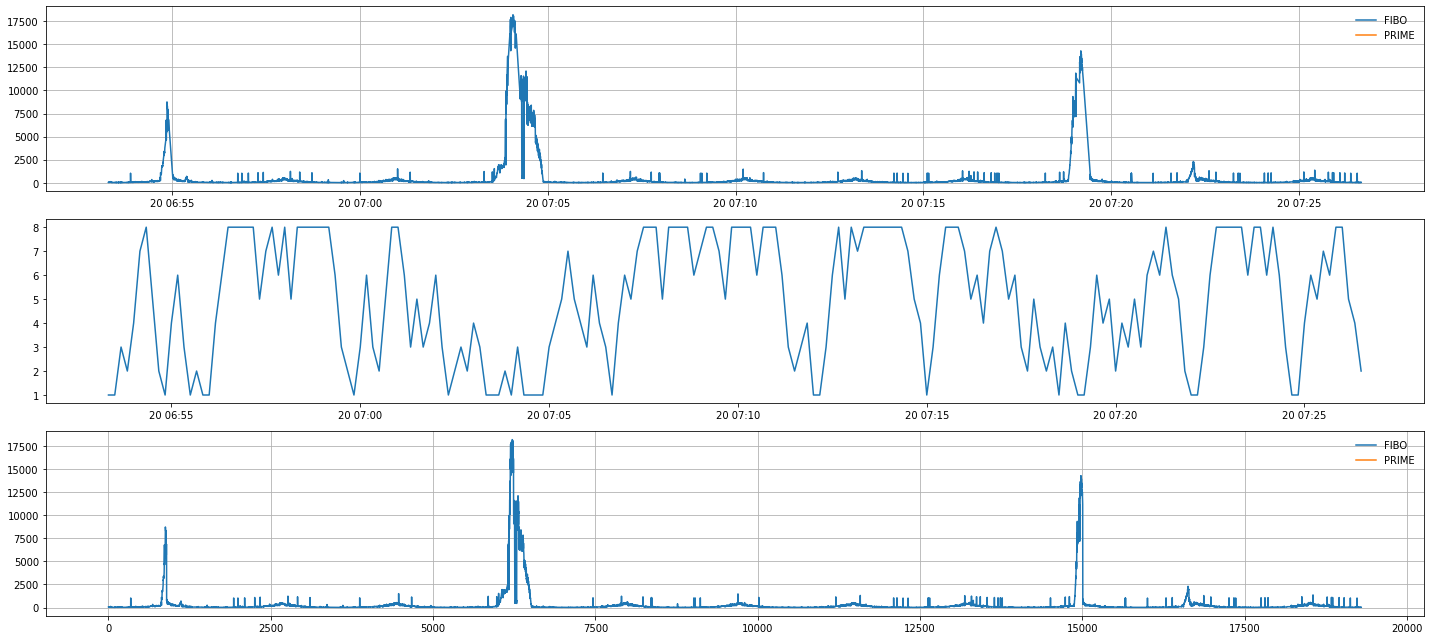

In [77]:
# Teljesen jó,

# ---

# Kiegészítés

# Azért ez még mindíg nem tökéletes

# Az igazi az lenne ha a scaler.log-ból olvasnám ki, hogy mikor volt skálázás és azt tenném rá.


def plot(dot):
    
    if dot == False:
        linewidth = 1.5
        marker = None
    if dot == True:
        linewidth = 0.0
        marker = '.'
        
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(FIBO['date'], FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax0.plot(PRIME['date'], PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(df['nntime'], df['worker_number'])
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(FIBO['Latency'], marker=marker, linewidth=linewidth, label='FIBO')
    ax2.plot(PRIME['Latency'], marker=marker, linewidth=linewidth, label='PRIME')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()
    
plot(dot = False)

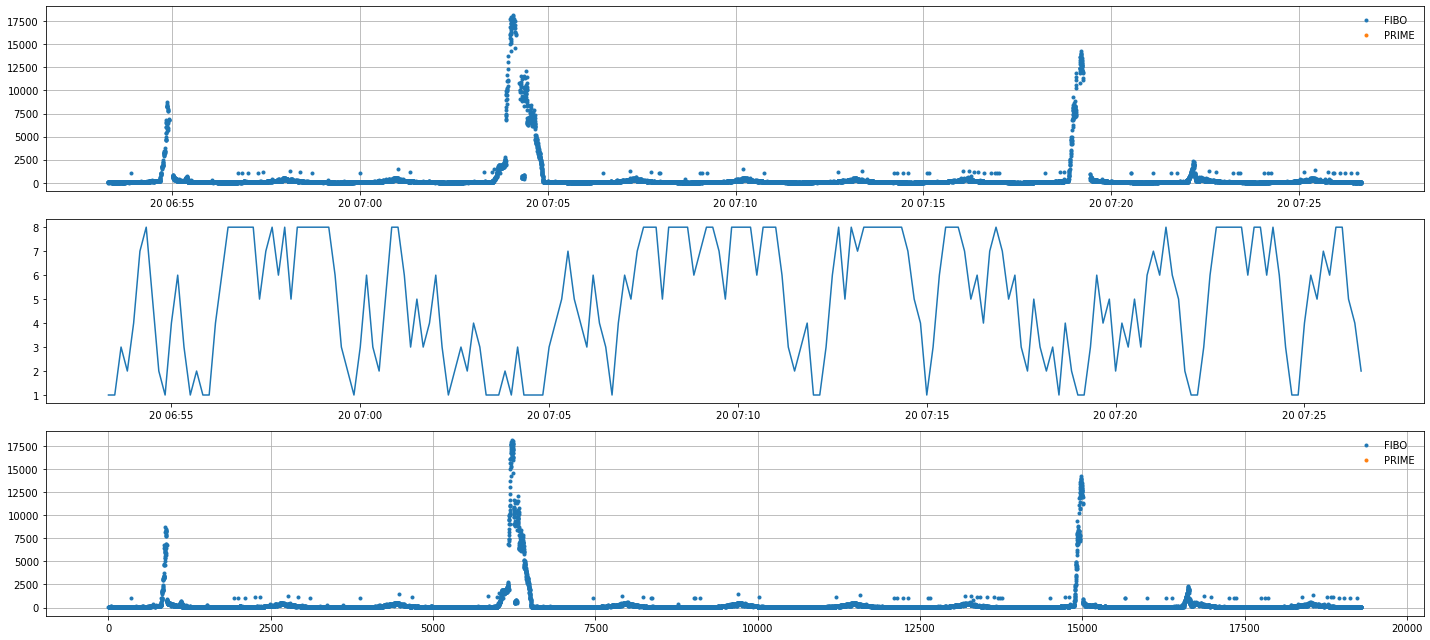

In [78]:
plot(dot = True)

Na tehát

Mire voltam kíváncsi?

Hogy az egyik REST API magával rántja-e a másikat?

---

Nagyítás

In [79]:
start_date = '2023-05-20 9:00'
end_date = '2023-05-20 10:30'

mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
F = FIBO.loc[mask]

F.shape

(0, 28)

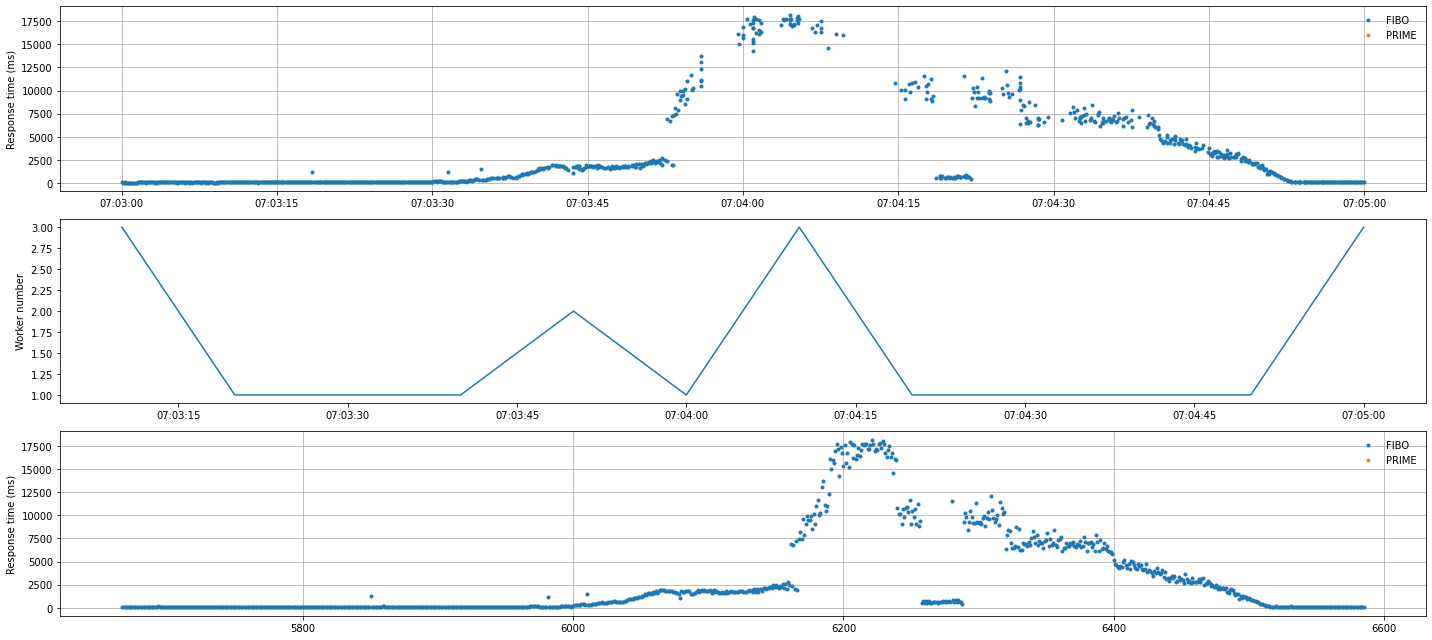

In [83]:
def zoom(start_date, end_date):

    mask = (FIBO['date'] > start_date) & (FIBO['date'] <= end_date)
    F = FIBO.loc[mask]

    mask = (PRIME['date'] > start_date) & (PRIME['date'] <= end_date)
    P = PRIME.loc[mask]
    
    mask = (df['nntime'] > start_date) & (df['nntime'] <= end_date)
    D = df.loc[mask]
    
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 9))
    ax0.plot(F['date'], F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax0.plot(P['date'], P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax0.set_ylabel('Response time (ms)')
    ax0.grid(b='on')
    ax0.tick_params(axis='x', rotation=90)
    ax0.tick_params(axis='x', rotation=0)
    ax0.legend(frameon=False)

    ax1.plot(D['nntime'], D['worker_number'])
    ax1.set_ylabel('Worker number')
    ax1.tick_params(axis='x', rotation=90)
    ax1.tick_params(axis='x', rotation=0)

    ax2.plot(F['Latency'], marker='.', linewidth=0, label='FIBO')
    ax2.plot(P['Latency'], marker='.', linewidth=0, label='PRIME')
    ax2.set_ylabel('Response time (ms)')
    ax2.grid(b='on')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='x', rotation=0)
    ax2.legend(frameon=False)
    plt.tight_layout()
    plt.show()

zoom('2023-05-20 7:03', '2023-05-20 7:05')

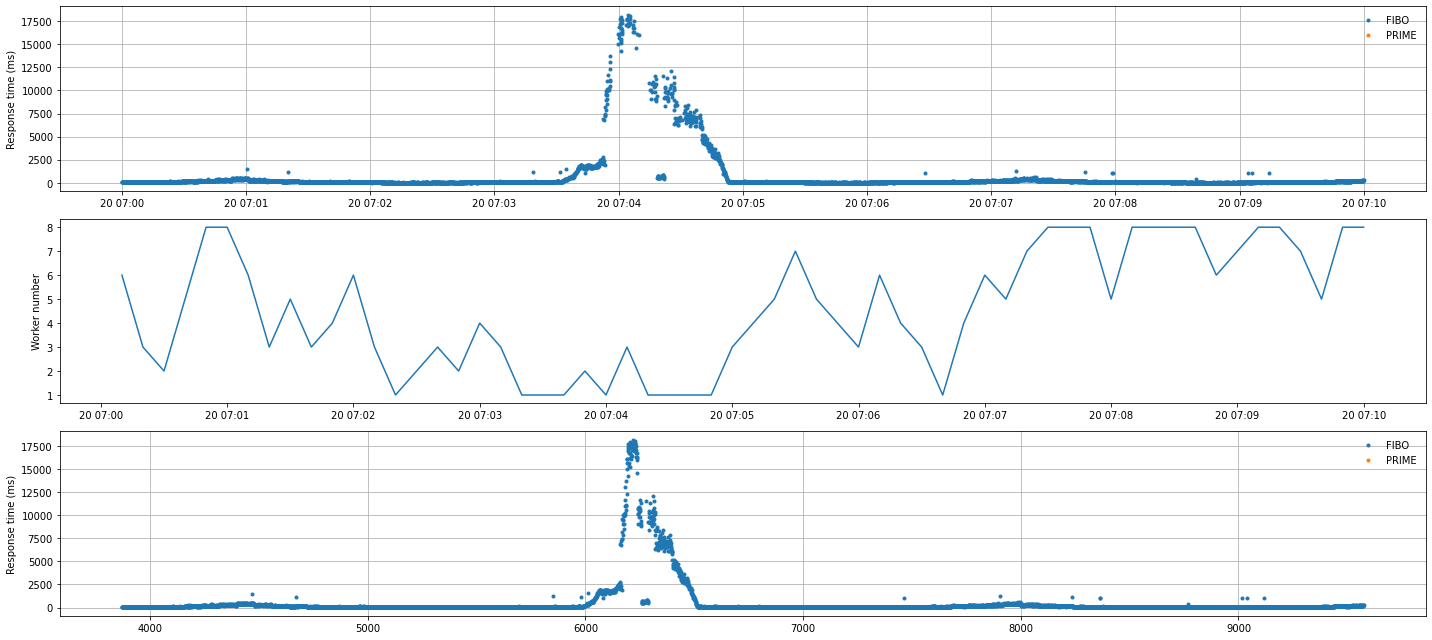

In [84]:
zoom('2023-05-20 7:00:00', '2023-05-20 7:10')

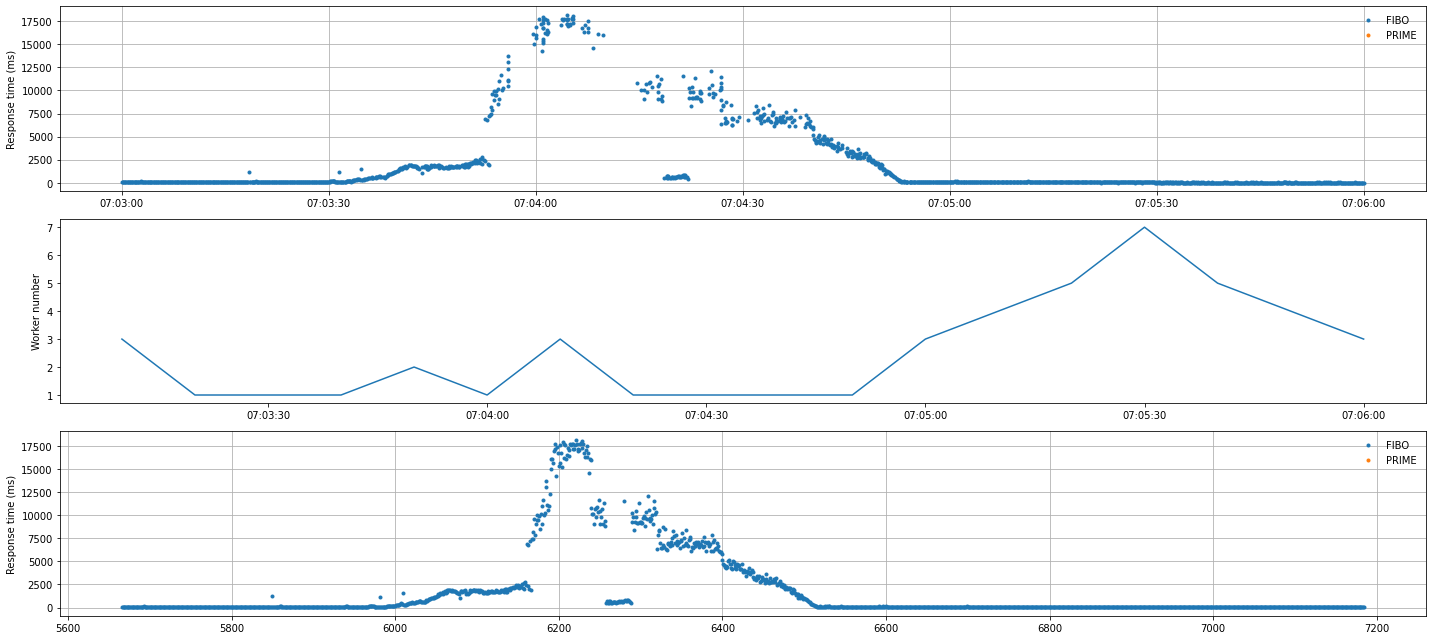

In [86]:
zoom('2023-05-20 7:03:00', '2023-05-20 7:06')

## Helpers

In [ ]:
# Ha szövegből kell datatimeot csinálnom

from datetime import datetime

datetime_str = '2023-05-17 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

print(type(datetime_object))
print(datetime_object)
